<a href="https://colab.research.google.com/github/Narendraiitg/Converting-the-photo-to-sketch-and-water-coloring-using-open_CV/blob/main/Converting_the_photo_to_sketch_and_water_coloring_using_open_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Converting the photo to sketch and  water coloring using open_CV**

In [1]:
# Importing the libraries
import numpy as np 
import matplotlib.pyplot as plt
import cv2

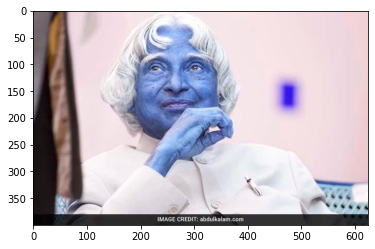

In [2]:
# Reading an image
img = cv2.imread("/content/apj-abdul-kalam_650x400_51481193286.jpg") 
plt.imshow(img)

If we see the above image than the color did not seems quit well, This is because OpenCV reads the order of the color channels in colored images as BGR, but the order of the color channels in the original image may be RGB. To correct this we can use the **cv2.cvtColor()** method with the input parameters being the image and `cv2.COLOR_BGR2RGB` to indicate that we are converting the image from the form BGR to RGB, as you see below.

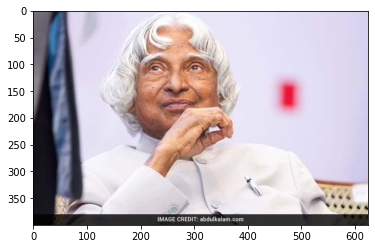

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

**Turning the above photograph into an sketch**

Converting the Image To Grayscale

In the preprocessing step, colored images are oftentimes converted to grayscale to make computation faster and simpler, since grayscale images only have one color channel where as colored images have three. Moreover, color information usually doesn't help us identify the features we are looking for. OpenCV has the method **cv2.cvtColor()** that can convert colored image to a grayscale image. Below, the first parameter, img, is the image you want to convert and the second parameter, `cv2.COLOR_BGR2GRAY`, indicates that you want to convert your image from a BGR image to a grayscale image.

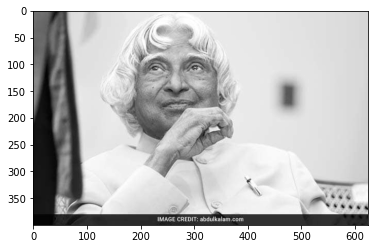

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

Smoothing the image

Generally the smoothing filters are applied on the images to remove/filterout the noises(image noise is nothing but the random changes in the brightness of the images), The effect of smoothing on image is making the image more blurry. A popular smoothing filter that is used is the Gaussian filter.


OpenCV has the method **cv2.GaussianBlur()** that applies the Gaussian filter to an image. The parameters the method takes is the image we want smoothed, the size of the filter (for example the parameter value of (5,5) indicates a square filter with each side being 5 pixels long), and the value of sigma. The sigma parameter controls how blurry we want our image to become.

The value of sigma is initially set to 2, we can try different sigma value (such as 1,5 and etc) to see the difference in the resulting image.

we will notice that the higher the value of sigma, the more blurry the resulting image becomes. we can think of it like the higher the value of sigma, the more information we are removing from the image. So we need to choose an appropriate sigma value such that important features of the image remain intact after the Gaussian filter is applied.


In [17]:
blur1 = cv2.GaussianBlur(gray,(5,5),1)
blur2 = cv2.GaussianBlur(gray,(5,5),2)
blur3 = cv2.GaussianBlur(gray,(5,5),5)

Text(0.5, 1.0, 'Sigma=5')

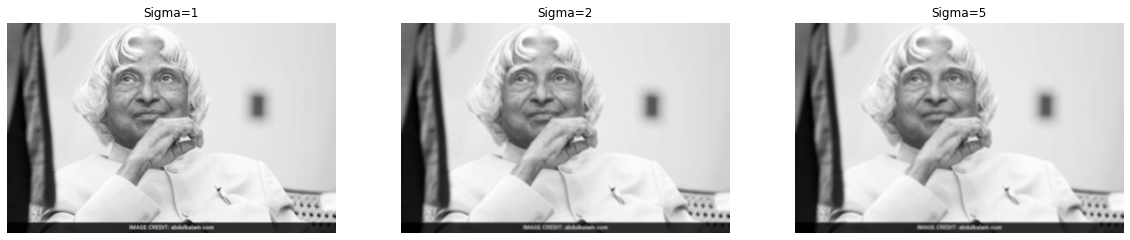

In [18]:
# create figure
fig = plt.figure(figsize=(20, 15))
  
# setting values to rows and column variables
rows = 1
columns = 3
# Adds a subplot at the 1st position

fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(blur1,cmap = 'gray')
plt.axis('off')
plt.title("Sigma=1")

# Adds a subplot at the 2nd position

fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(blur2,cmap = 'gray')
plt.axis('off')
plt.title("Sigma=2")

# Adds a subplot at the 2nd position

fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(blur3, cmap = 'gray')
plt.axis('off')
plt.title("Sigma=5")

**Detecting the Edges in the image**

The edges of an image are the parts of an image where the brightness changes quickly. To detect the edges of an image, we need to compute something called the gradient magnitude of an image. The gradient magnitude of an image measures how quickly the image is changing and it is used for edge detection. To get a sketch for our photograph, we will compute the gradient magnitude of the image.

To get the gradient magnitude of an image, we need to calculate the verticle and horizontal components of the gradient of the image. In other words, we need to calculate how much the image changes in the horizontal direction (the x component of the gradient), $dx$, and the verticle direction (the y component of the gradient), $dy$. To calculate how much the image changes in the each direction, we apply a filter called the Sobel filter to the images. To do this in OpenCV, we use the method **cv2.Sobel()**.

The formula for the gradient magnitude is $\sqrt {\left( {dx} \right)^2 + \left( {dy} \right)^2 }$.

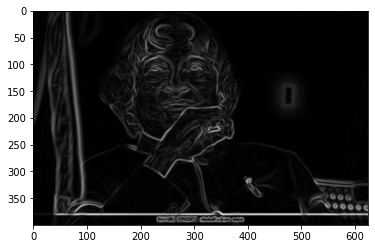

In [19]:
sobelx = cv2.Sobel(blur1,cv2.CV_64F,1,0,ksize=5) # Change in horizonal direction, dx
sobely = cv2.Sobel(blur1,cv2.CV_64F,0,1,ksize=5) # Change in verticle direction, dy
gradmag_sq = np.square(sobelx)+np.square(sobely) # Square the images element-wise and then add them together 
gradmag = np.sqrt(gradmag_sq) # Take the square root of the resulting image element-wise to get the gradient magnitude

plt.imshow(gradmag, cmap ='gray')

We will now reverse colors of the gradient magnitude of the image. In other words, we want to make the light regions dark and the dark regions light. Lighter regions have a pixel value closer to 255, which is the value for white, and darker regions have a pixel value closer to 0, which is the value for black. To reverse the colors of the gradient magnitude we will replace every pixel value with the pixel value subtracted from 255 since 255 is the maximum possible pixel value in a grayscale image.

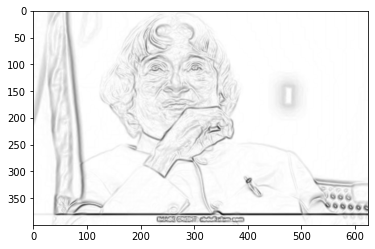

In [20]:
gradmag_inv = 255-gradmag # Reverse the colors in the image
plt.imshow(gradmag_inv, cmap = "gray")

**Thresholding our image**

Thresholding is a method used to turn an image from grayscale (pixel value from 0 - 255) into a binary image. A binary image is an image where every pixel has one of two possible values, usually a value of 0 (black) or 255 (white). The way the algorithm typically works is that for given threshold value that ranges from 0 to 255, if the pixel value is less than the threshold value it is mapped to 0 (black) and if the pixel value is greater than the threshold value then the pixel value is mapped to the maximum value, usually 255 (white). 

If you want to have a sketch of your photo where the only colors are black and white, you can take the threshold of your image. OpenCV  has a method for getting the threshold of an image called **cv2.threshold()**. This method returns a tuple where the first element of the tuple is the threshold value and the second is the thresholded image. For the thresholding method we will be using in this task, we will be supplying the threshold value in the input but there are other forms of thresholding where the threshold value needs to be computed.

The parameters of this method are `src`, `thres`, `maxval` and `type`. `src` is a grayscale image, `thres` is your threshold value, `maxval` is the maximum value you are assigning to a pixel and `type` is the type of thresholding you want to use. As you will see in the code cell below, the threshold value we have set is 10, the maximum value is 255 and the the thresholding method we have set is `cv2.THRESH_BINARY`. `cv2.THRESH_BINARY` just indicates that if the pixel value is less than the threshold value then set the value to 0, otherwise set the value to 255.


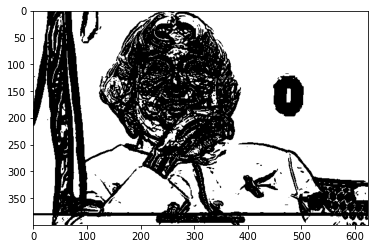

In [21]:
thresh_value, thresh_img = cv2.threshold(gradmag_inv,10,255,cv2.THRESH_BINARY)
plt.imshow(thresh_img, cmap = 'gray')

**Pencil Sketch effect on the image**

The method **cv2.pencilSketch()** returns both a gray and colored pencil sketch of the input image. The input image we will be using is our original colored image from Exercise 1 that the colors looked as they should, img_rgb. You will notice in the code below that the method takes in other parameters as well, `sigma_s`, `sigma_r` and `shade_factor`.

*   `sigma_s`, a value from 0-200, determines how smooth you want the resulting image to become. The higher the value of `sigma_s` the smoother the image.

*   `sigma_r`, a value from 0-1, determines how much you want different colors in your image to be blended. A small `sigma_r` value indicates that you only want regions of similar color to be smooth while the different colors remain intact. This parameter is important when you want to preserve the edges of an image when you are smoothing it.

*   The `shade_factor` is a value between 0-0.1. The higher the value of the `shade_factor` the brighter the image.

We have set an initial value for these parameters in the code below, but play around with these parameters and see how to resulting image changes for yourself!

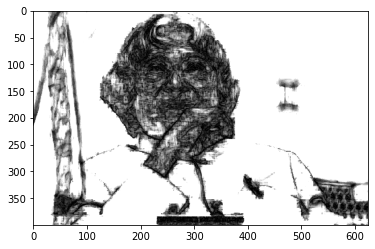

In [22]:
pencilsketch_gray, pencilsketch_color  = cv2.pencilSketch(img_rgb, sigma_s=60, sigma_r=0.07, shade_factor=0.05) 

plt.imshow(pencilsketch_gray, cmap ='gray') # To plot the black and white pencil sketch

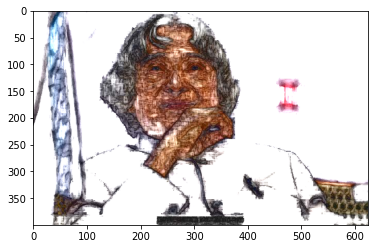

In [23]:
plt.imshow(pencilsketch_color) # To plot the colored sketch

**Water coloring effect on an image**

Like the **cv2.pencilSketch()** method, the **cv2.stylization()** method takes in parameter values of `sigma_s` and `sigma_r`.Moreover, the input image we will be using is our original colored image from Exercise 1, img_rgb. As defined in the previous exercise:

*   `sigma_s` determines how smooth you want the resulting image to become. The higher the value of `sigma_s` the smoother the image.

*   `sigma_r` determines how much you want different colors in your image to be blended. A small `sigma_r` value indicates that you only want regions of similar color to be smooth while the different colors remain intact. This parameter is important when you want to preserve the edges of an image when you are smoothing it.

Experiment with different parameter values for `sigma_s` and `sigma_r` for your image and see which one you think looks best!

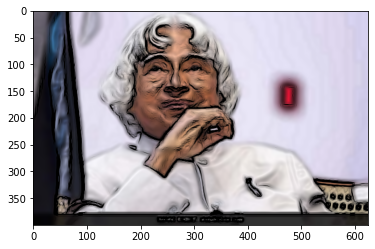

In [24]:
waterpainting = cv2.stylization(img_rgb, sigma_s=3, sigma_r=3)
plt.imshow(waterpainting)